In [3]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import imghdr
import os
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
#stop photos


# Set the path to the folder containing the images
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\stop photos'

# Create an empty list to store the images
X = []
y = []

# Loop over all the files in the folder
for filename in os.listdir(path_to_folder):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Load the image using OpenCV
        try:
            
                img = cv2.imread(os.path.join(path_to_folder, filename))
                resized_img = cv2.resize(img, (224, 224))
                normalized_img = resized_img / 255.0

                # Add the image to the list
                X.append(normalized_img)
                y.append(1)

        
        except:       
                
                image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\stop photos'+str(filename)

                if os.path.exists(image_path):
                        os.remove(image_path)
                        print(f"Deleted {image_path}")
                else:
                        print(f"{image_path} does not exist")
              

C:\Users\gillp\Downloads\deep learning\traffic sign\image data\stop photos01_stopsign_Stop-Signs-Used-to-Be-Yellow—More-Recently-Than-You-Think_376238113_Usa-Pyon.jpg does not exist


In [5]:
len(X)

435

In [6]:

 # Set the path to the folder containing the images
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\Construction zone sign'


    # Loop over all the files in the folder
for filename in os.listdir(path_to_folder):
        # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Load the image using OpenCV
            
            try:
                    img = cv2.imread(os.path.join(path_to_folder, filename))
                    resized_img = cv2.resize(img, (224, 224))
                    normalized_img = resized_img / 255.0

                        # Add the image to the list
                    X.append(normalized_img)
                    y.append(0)
            except:       
                
                image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data \\Construction zone sign'+str(filename)

                if os.path.exists(image_path):
                        os.remove(image_path)
                        print(f"Deleted {image_path}")
                else:
                        print(f"{image_path} does not exist")
              

C:\Users\gillp\Downloads\deep learning\traffic sign\image data \Construction zone signRoad-Construction-Zones-–-Workers-in-Danger.jpeg does not exist


In [7]:
len(X)

764

In [8]:
y_arr = np.array(y)
X_arr = np.array(X)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(611, 224, 224, 3)

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [13]:
cnn = models.Sequential([
    #cnn
    
    layers.Conv2D(filters = 32, activation = 'relu', input_shape=(224,224,3),  kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, activation = 'relu',  kernel_size = (3,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense 
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
    
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
20/20 [==============================] - 10s 442ms/step - loss: 2.3839 - accuracy: 0.5074
Epoch 2/10
20/20 [==============================] - 9s 454ms/step - loss: 0.6034 - accuracy: 0.7234
Epoch 3/10
20/20 [==============================] - 8s 418ms/step - loss: 0.3890 - accuracy: 0.8249
Epoch 4/10
20/20 [==============================] - 8s 412ms/step - loss: 0.3343 - accuracy: 0.8494
Epoch 5/10
20/20 [==============================] - 8s 412ms/step - loss: 0.2333 - accuracy: 0.9116
Epoch 6/10
20/20 [==============================] - 8s 415ms/step - loss: 0.1489 - accuracy: 0.9542
Epoch 7/10
20/20 [==============================] - 9s 440ms/step - loss: 0.0772 - accuracy: 0.9820
Epoch 8/10
20/20 [==============================] - 9s 434ms/step - loss: 0.0476 - accuracy: 0.9885
Epoch 9/10
20/20 [==============================] - 9s 474ms/step - loss: 0.0252 - accuracy: 0.9967
Epoch 10/10
20/20 [==============================] - 9s 430ms/step - loss: 0.0194 - accuracy: 0.998

In [54]:
cnn.evaluate(X_test, y_test)

5/5 [==============================] - 1s 131ms/step - loss: 0.5378 - accuracy: 0.8105


[0.5378035306930542, 0.8104575276374817]

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

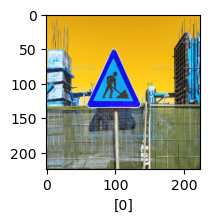

In [18]:
plot_sample(X_test, y_test,5)


In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.62      0.73        65
           1       0.77      0.95      0.85        88

    accuracy                           0.81       153
   macro avg       0.84      0.78      0.79       153
weighted avg       0.83      0.81      0.80       153



In [ ]:
model = cnn
import os
from PIL import Image
import shutil

# Define the directory containing the images to classify
path_to_folder = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\random'

# Loop over each image in the directory
for filename in os.listdir(path_to_folder):
        # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            # Load the image using OpenCV
       # try:
            
                #count = count+1
                img = cv2.imread(os.path.join(path_to_folder, filename))

                resized_img = cv2.resize(img, (224, 224))
                img_array = np.array(resized_img)
                normalized_img = img_array / 255.0
                img_end = np.expand_dims(normalized_img, axis=0)



                # Classify the image and store the result

                y_pred = model.predict(img_end)
                y_pred_classes = [np.argmax(element) for element in y_pred]

                # Traceback the original filename of the image
                print(y_pred_classes)
                print(f"Original filename: {filename}, Classification result: {y_pred_classes}")
                if(y_pred_classes[0] == 0):

                        image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\random\\'+str(filename)
                        new_location = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\test const image\\'+str(filename)

                        shutil.move(image_path, new_location)

      #  except:
                               
                
                        image_path = 'C:\\Users\\gillp\\Downloads\\deep learning\\traffic sign\\image data\\random\\'+str(filename)

                        if os.path.exists(image_path):
                            os.remove(image_path)
                            print(f"Deleted {image_path}")
                        else:
                            print(f"{image_path} does not exist")
                


In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [30]:
model1 = cnn

In [26]:
img = plt.imread('1-1.jpg')
img = cv2.resize(img, (224, 224))
img = np.array(img)
img = img / 255.0
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# Predict the class of the test image
predictions = model.predict(img)
class_index = np.argmax(predictions)
confidence_scores = predictions
probabilities = np.exp(confidence_scores) / np.sum(np.exp(confidence_scores))



#if (probabilities[0][0] < 0.6) & (probabilities[0][1] < 0.6 ):
  #  print("no class")


In [44]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet

In [56]:
img_width, img_height = 224, 224
num_epochs = 10
batch_size = 32
num_classes = 1

In [46]:
base_modelmodel = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [57]:
from keras.layers import Dense, GlobalAveragePooling2D

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [58]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [59]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [60]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
20/20 [==============================] - 25s 1s/step - loss: 0.0000e+00 - accuracy: 0.5679
Epoch 2/5
20/20 [==============================] - 22s 1s/step - loss: 0.0000e+00 - accuracy: 0.5679
Epoch 3/5
20/20 [==============================] - 22s 1s/step - loss: 0.0000e+00 - accuracy: 0.5679
Epoch 4/5
20/20 [==============================] - 22s 1s/step - loss: 0.0000e+00 - accuracy: 0.5679
Epoch 5/5
20/20 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accuracy: 0.5679


In [23]:
class_index

1

In [24]:
predictions

array([[1.1071777e-01, 8.8928223e-01, 9.4942852e-11, 8.3677145e-09,
        4.7341509e-13, 6.5425436e-11, 1.8267966e-10, 5.0600149e-12,
        1.9598694e-11, 1.7503169e-11]], dtype=float32)

In [25]:
confidence_scores = predictions
# apply softmax function to obtain probabilities
probabilities = np.exp(confidence_scores) / np.sum(np.exp(confidence_scores))

print(probabilities)

[[0.09671298 0.21067403 0.08657662 0.08657662 0.08657662 0.08657662
  0.08657662 0.08657662 0.08657662 0.08657662]]
